In [2]:
import numpy as np 
import pandas as pd 

In [4]:
#summary statistics of data
staff_data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


**[](http://)Analyzing and Visualizing data for Unique trends**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
staff_data.dtypes


EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

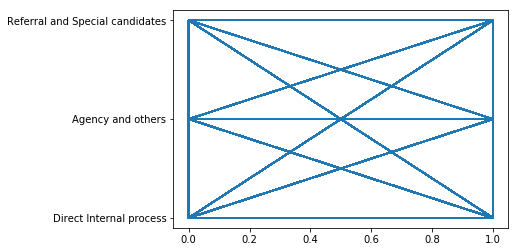

In [7]:
X=staff_data.Promoted_or_Not
Y=staff_data.Channel_of_Recruitment
plt.plot(X,Y)

**#Prepare dataset for encoding**

In [39]:
y_target= staff_data['Promoted_or_Not']
staffdata_new = staff_data.drop(['EmployeeNo','Promoted_or_Not'], axis=1)


In [40]:
staffdata_new.head(3)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0


In [41]:
staffdata_new.shape

(38312, 17)

**#Using One-Hot Encoding to encode the Categorical data**

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [43]:
One_hot_staff_data=pd.get_dummies(staffdata_new)

In [44]:
One_hot_staff_data.shape

(38312, 77)

In [45]:
One_hot_staff_data.head(2)

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,2,1986,12.5,2011,1,0,41,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,2,1991,12.5,2015,0,0,52,0,0,1,...,0,1,0,1,0,0,0,0,0,0


**#Nomalisation of Data**

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [47]:
scaler = StandardScaler()
scaler.fit(One_hot_staff_data)
new_staff_data = scaler.transform(One_hot_staff_data)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_staff_data, y_target, test_size = 0.2)

In [50]:
print("shape of training data is", X_train.shape)
print("shape of training target is", y_train.shape)
print("shape of test data is", X_test.shape)
print("shape of test target is", y_test.shape)

shape of training data is (30649, 77)
shape of training target is (30649,)
shape of test data is (7663, 77)
shape of test target is (7663,)


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
#create and fit model using Logistic Regression model
staff_model= LogisticRegression()
staff_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
val_predictions = staff_model.predict(X_test)

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(val_predictions, y_test)

0.41457858769931666

In [59]:
staff_model.fit(new_staff_data, y_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#Now make prediction using test data
test_data= pd.read_csv('test.csv')
test_data.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [61]:
#selecting features for test data
test_X=test_data.drop(['EmployeeNo'], axis=1)

In [62]:
test_X.head(2)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1


In [63]:
#encoding test dataset
One_hot_test_data=pd.get_dummies(test_X)
final_train, final_test = One_hot_staff_data.align(One_hot_test_data, join='inner')

In [64]:
scaler = StandardScaler()
scaler.fit(One_hot_test_data)
X_test = scaler.transform(One_hot_test_data)

In [65]:
X_test

array([[-0.41300226, -1.31826538, -0.05142113, ..., -0.18396486,
        -0.15764167, -0.09770938],
       [-0.41300226,  0.62777613, -2.05988914, ..., -0.18396486,
        -0.15764167, -0.09770938],
       [-0.41300226, -0.28037657, -0.05142113, ..., -0.18396486,
        -0.15764167, -0.09770938],
       ...,
       [-0.41300226, -1.96694588,  1.28755754, ..., -0.18396486,
        -0.15764167, -0.09770938],
       [ 1.2294484 ,  0.49804003, -1.39039981, ..., -0.18396486,
        -0.15764167, -0.09770938],
       [-0.41300226, -1.70747368, -0.05142113, ..., -0.18396486,
        -0.15764167, -0.09770938]])

In [66]:
sample_submission=pd.read_csv('sample_submission2.csv')
sample_submission.head(3)

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1


In [67]:
#making predictions from test data that will be submitted
test_prediction=staff_model.predict(X_test).astype(int)


In [68]:
sample_submission.EmployeeNo=test_data.EmployeeNo

In [69]:
sample_submission.head(3)

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,1
1,YAK/S/00011,1
2,YAK/S/00015,1


In [70]:
sample_submission.Promoted_or_Not=test_prediction

In [71]:
sample_submission.to_csv("my_submission6.csv", index = False)